In [1]:
#CONDA JUPYTER THEME DESCARGAR DESDE TERMINAL
!jt -t chesterish


# TRABAJO FINAL (DATA SCIENCE)

## ANÁLISIS DE VISUALIZACIÓN Y MACHINE LEARNING SOBRE EL BALONCESTO EN LA NBA.
Andrea Donadío y María José Fernández

### INTRODUCCIÓN

    El baloncesto es un deporte de equipo, jugado entre dos conjuntos de cinco jugadores cada uno durante cuatro periodos de diez minutos cada uno. El objetivo es anotar de 1 a 3 puntos introduciendo un balón por la canasta.  
    
    La "National Basketball Association" o NBA (por sus siglas en inglés) es la liga privada de baloncesto profesional de Estados Unidos y se ha convertido una de las ligas deportivas mas famosas en todo el mundo.El baloncesto es uno de los deportes más lucrativos que exite, y mueve alrededor de 3.000 millones de dólores entre sus jugadores.

   
### OBTENCIÓN Y EXPLICACIÓN DEL SET DE DATOS

    El set de Datos se ha obtenido de Kaggle en asociación con IBM, cuenta con un conjunto de 342 jugadores o samples con 37 aspectos (variables) sobre esos jugadores.

    Se pretende hacer un análisis estadístico y sobre la influencia del rendimiento de los diferentes jugadores en el salario de los mismos. 
    
    Se realizarán estudios sobre que variables influyen más sobre el salario de los jugadores, llegando a crear distintos modelos de clasificación que lo predigan.
    
### METODOLOGÍA

    Se pretende hacer un análisis estadístico y sobre la influencia del rendimiento de los diferentes jugadores en la cancha en el salario de los mismos. Se realizarán estudios sobre que variables influyen más sobre el salario de los jugadores, llegando a crear distintos modelos de clasificación que lo predigan.

    VOLUMEN 1: 
    1. IMPORTAR LIBRERÍAS Y DATOS
    2. LIMPIEZA DE DATOS
    3. VISUALIZACIÓN DE DATOS 
    4. PCA: ANÁLISIS DE COMPONENTES PRINCIPALES
         - Varianza explicada
         - Componentes principales
    5. NORMALIDAD DE LOS DATOS
         - Gráficos de distribución de variables
         - Test de Shapiro
    
    VOLUMEN 2: MACHINE LEARNING
    
    6. MODELO LINEAL PARA PREDECIR EL SALARIO UTILIZANDO TODAS LAS VARIABLES
    7. REGRESIÓN LOGÍSITCA UTILIZANDO TODAS LAS VARIABLES, PARA PREDECIR SALARIOS MAYORES A 10 MILLONES DE DÓLARES
    8. MODELOS DE CLASIFICACIÓ TENIENDO EN CUENTA LA SELECCION DE VARIABLES C0N T-TEST
        - Regresión lineal
        - Regresión logística
    9. MODELO DE FEATURE SELECTION MEDIANTE THRESHOLD DE VARIANZA, SVM Y REGRESIÓN LOGÍSTICA COMO MODELO DE PREDICCIÓN DE SALARIOS MAYORES A 16 MILLONES DE DOLARES.
    
    10. CONCLUSIONES
    11. BIBLIOGRAFÍA


### DATOS

    Se tienen un conjunto de 342 jugadores o samples con 37 aspectos (variables) sobre esos jugadores.

    Dado que hay variables específicas del baloncesto se prodecerá a explicar resumidamente cada variable, para entender con mayor facilidad el analisis posterior.
- POSITION: Posición de cada jugador, pueden ser:
         - C: Centro
         - PF: Ala Pivot
         - PG: Base
         - SF: Alero
         - SG: Escolta
- MP   Minutos jugados.
- FG   Field goals o gol de campo se refiere a las canastas conseguidas.
- FGA  Intentos de goles de campo
- FG%  Field Goal Percentage sirve para saber como de buenos son los itros de un jugador durante el juego.
- 3P   3-Point Field Goals son las canastas hechas desded más alla de la linea de tres puntos
- 3PA  3-Point Field Goal Attempts son laos intentos de canastas hechos desded más alla de la linea de tres puntos 
- 3P%  3-Point Field Goal Percentage 
- 2P   2-Point Field Goals son las canastas realizadas desde dentro o en la linea de dos puntos. Son los puntos más comunes.
- 2PA  2-Point Field Goal Attempts son los intentos de canastas realizados desde dentro o en la linea de dos puntos.
- 2P%  2-Point Field Goal Percentage;
- eFG% Effective Field Goal Percentage es una medida ponderada del porcentaje de tiro. Es una forma más precisa para que un equipo mida su éxito de tiro.
- FT   Free Throws o tiro libre
- FTA  Free Throw Attempts intentos de tiro libre
- FT%  Free Throw Percentage
- ORB  Offensive Rebounds es el rebote que se coge en el ataque, es decir cuando un equipo falla un lanzamiento y vuelve a ganal la posesión del balon sin que el equipo rival lo haya conseguido.
- DRB  Defensive Rebounds es el rebote por el cual se consigue la posesion del balón y se evita que el contratio obtenga segundas oportunidades para antar canasta
- TRB  Total Rebounds es conseguir la posesión del balón
- AST  Assists o asisitencia es un pase que da a un jugador a otro de manera que éste anota una canasta
- STL  Steals o robar el balón
- BLK  Blocks o bloqueo
- TOV  Turnovers es una rotación ocurre cuando un equipo pierde la posesión del balón ante el equipo contrario antes de que un jugador tome un tiro a la canasta de su equipo.
- PF   Personal Fouls o faltas
- POINTS Puntos
- TEAM   Equipo
- GP     Cantidad de juegos jugados
- MPG    Minutes per Game
- ORPM   Impacto estimado del jugador en la cancha en el rendimiento ofensivo del equipo, medido en puntos anotados por cada 100 posesiones ofensivas
- DRPM   Impacto estimado del jugador en la cancha en el rendimiento defensivo del equipo, medido en puntos permitidos por cada 100 posesiones defensivas
- RPM    Real Plus Minus o impacto estimado del jugador en la cancha en el rendimiento del equipo, medido en diferencial neto de puntos por cada 100 posesiones ofensivas y defensivas. RPM tiene en cuenta compañeros de equipo, oponentes y factores adicionales
- WINS_RPM  Número de victorias que cada jugador ha contribuido al total de victorias de su equipo en la temporada
- RPM Wins Proporcione una estimación del número de victorias que cada jugador ha contribuido al total de victorias de su equipo en la temporada. RPM Wins incluye al jugador
- PIE  Player Impact Estimate es una métrica para medir la contribución general de un jugador al juego
- PACE  Pace Factor ide el número de posesiones del balón por un equipo en un partido de baloncesto
- W   juegos ganados
- SALARY_MILLIONS millones que gana cada jugador



# VOLUMEN 1

##  1. IMPORTAR LIBRERIAS Y DATOS

In [2]:
#Tratamiento de datos

import pandas as pd
import numpy as np # linear algebra

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('seaborn-pastel') or plt.style.use('seaborn-pastel')

import scipy.stats as stats
from statsmodels.graphics.factorplots import interaction_plot

import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


In [3]:
Datos2 = pd.read_csv(r'G:\Mi unidad\MASTER\DATA SCIENCE\TRABAJO_FINAL\archive\nba_2017_nba_players_with_salary.csv')
#Datos2 = pd.read_csv(r'C:\Users\usuario\Downloads\archive (7)\nba_2017_nba_players_with_salary.csv')
display(Datos2)

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
3,3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
4,4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,337,466,Brice Johnson,PF,22,3.0,0.7,2.3,0.286,0.0,...,3,3.0,-2.32,1.08,-1.24,0.01,10.8,95.72,1,1.33
338,338,471,Mike Tobey,C,22,12.5,0.5,2.0,0.250,0.0,...,2,12.5,-1.91,0.99,-0.92,0.03,-1.6,91.41,0,0.07
339,339,475,Alonzo Gee,SF,29,6.8,0.2,1.1,0.214,0.0,...,13,6.8,-2.11,0.43,-1.68,0.08,0.8,104.33,4,0.06
340,340,481,John Lucas III,PG,34,2.2,0.2,0.8,0.250,0.0,...,5,2.2,-1.30,-0.61,-1.91,0.01,7.3,94.47,3,0.98


## 2. LIMPIEZA DE DATOS

In [4]:
#Eliminación de NANs

pd.isna(Datos2).sum().sum()
print(f"NANs: {pd.isna(Datos2).sum().sum()} ")
Datos=Datos2.dropna()
Datos.shape

#Eliminación de Datos duplicados

Datos.duplicated().sum()
print(f"Duplicados: {Datos.duplicated().sum()} ")

NANs: 27 
Duplicados: 0 


In [5]:
#Existen algunos jugadores que tienen dos o más posiciones, nos quedaremos solo con una.

#Me quedo con la primera posición del array
Datos.index=list(range(0,Datos.shape[0]))
for i in range(0,len( Datos['TEAM']) ):
    Datos['TEAM'][i]=Datos['TEAM'][i].split(sep='/')[0]


## 3.VISUALIZACIÓN DE DATOS

Vamos a analizar diferentes parámetros visualmente para conocer nuestros datos y ver si se puede sacar alguna conclusión antes de realizar los análisis estadísticos.

Como lo que principalmente se quiere analizar es el salario, se van a mostrar una serie de datos para conocer esta varaible.

### Media, Varianza y Mediana

In [6]:
print(f"Varianza: {np.var(Datos.iloc[:,38])} ")
print(f"Media: {np.mean(Datos.iloc[:,38])} ")
print(f"Mediana: {np.median(Datos.iloc[:,38])} ")

Varianza: 43.39144266735663 
Media: 7.467634069400628 
Mediana: 5.0 


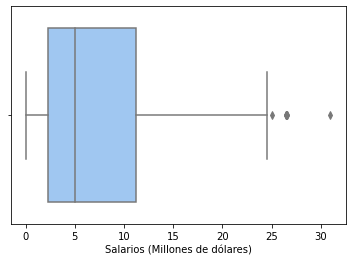

In [7]:
sns.boxplot(Datos.iloc[:,38])
plt.xlabel('Salarios (Millones de dólares)')
plt.show()

La mayoría de los salarios de los jugadores se encuentra ente 2 millones y 12 millones de dólares aproximadamente. La cantidad de jugadores pagados con 12 millones empieza a disminuir hasta llegar a los jugadors más especiales o exepcionales que llegan hasta 25 millones de dólares.

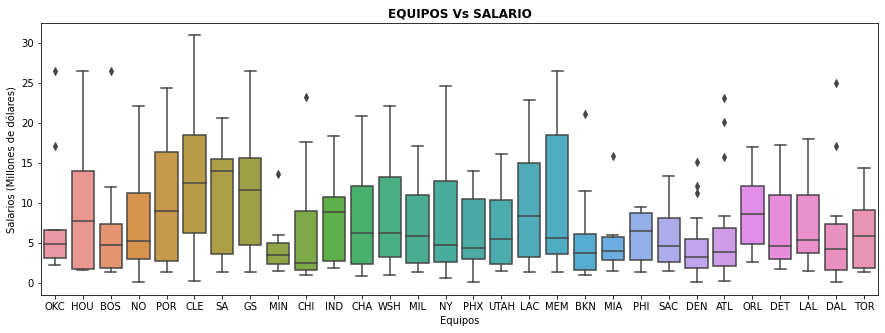

In [8]:
#Salarios por equipo
plt.subplots(figsize = (15,5))
sns.boxplot(Datos['TEAM'],Datos.iloc[:,38]).set_title('EQUIPOS Vs SALARIO',  fontweight = "bold")
plt.xlabel('Equipos')
plt.ylabel("Salarios (Millones de dólares)")
plt.show()

En el anterior gráfico podemos observar la media de salarios de los jugadores por equipos en la NBA. Como el gráfico nos esta dando las medianas, nos proporciona una información mas exacta que si se utilizasen las medias, ya aunque un equipo en general los salarios sean bajos, si tienen algunos jugadores estrella, la media aumentará, pero la mediana se quedará en una posición baja, dandonos una información  más realista.

Se puede observar que los equipos cuyos jugadores tienen mejores salarios, son los equipos Portland Trail Blazers (POR), Cleveland Cavaliers (CLE), San Antonio Spurs(SA) y Golden State Warriors(GS). El equipo que de media sus jugadores tienen mayor salario es San Antonio Spurs (SA), con la medio de salarios en 14 millones de dólares. 

En cuanto a la edad de los jugadores se espera que la mayoria se encuentre aproximadamente por debajo de 30, ya que aproximadamente a partir de esta edad se suelen empezar a retirar, aunque no hay una edad establecida. Por lo que tambien se espera que a partir de los 30 años ya la cantidad de jugadores vaya disminuyendo progresivamente.

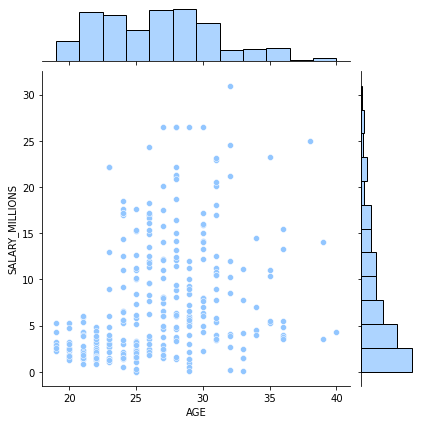

In [9]:
#Salarios por edad
sns.jointplot(Datos['AGE'],Datos.iloc[:,38])
plt.xlabel('Edad')
plt.ylabel("Salarios (Millones de dólares)")
plt.show()

En el siguiente plot podemos observar el comportamiento de el salario en función de la edad y posición del jugador. Interpretamos que la posición (SF) o del Alero es generalmente la mejor pagada hasta los 35 años, luego de cumplidos los 35 le sobrepasan C y SG, que corresponden a las posiciones del Centro y al Escolta.

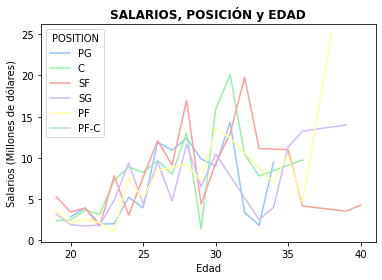

In [10]:
sns.lineplot(data=Datos, x="AGE", y="SALARY_MILLIONS",hue="POSITION", ci=None)
plt.xlabel('Edad')
plt.ylabel("Salarios (Millones de dólares)")
plt.title('SALARIOS, POSICIÓN y EDAD', fontweight = "bold")
plt.show()

En este plot podemos ver una estimación de la media del salario por cada posición de los jugadores, podemos observar que en general la posición del Centro es la mejor pagada, seguida del alero y la Base.

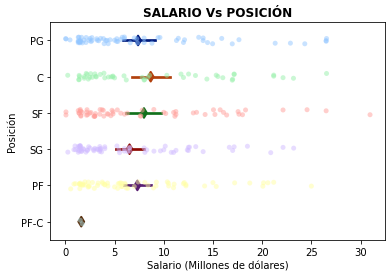

In [11]:
#SALARIO= Datos.iloc[:,38]
sns.stripplot(x=Datos.iloc[:,38], y="POSITION", data=Datos, alpha=.50)
sns.pointplot(x=Datos.iloc[:,38], y="POSITION", data=Datos, palette="dark", markers="d").set_title('SALARIO Vs POSICIÓN',  fontweight = "bold")
plt.xlabel('Salario (Millones de dólares)')
plt.ylabel("Posición")
plt.show()

En las anteriores figuras se puede observar como el salario puede depender de la edad, ya que se ve como los jugadores más jóvenes ganan menos (20 a 28 años). 
A medida que avanza la edad se puede intuir que los deportistas se vuelvan más experimentados por lo que comienzan a ganar más. A partir de los 30 años se ve como el número de jugadores activos se reduce y además si continúan jugando en este rango de edad su salario empeora, exitiendo algunas excepciones. 

Se puede ver como cuando los jugadores son jóvenes, la posición que ocupan en la cancha no afecta mucho a su salario. A medida que avanza la edad la posición casi no influye en el salario, excepto en el rango de 30 a 35 años donde ser Base y Escolta está significativamente menor pagado que las demás posiciones. Igualmente ya que la cantidad de datos para estas posiciones se ve reducida por la cantidad de jugadores activos no se podría confirmar con exactitud la veracidad de este dato.

Por lo que a priori no podria decirse que la posicón influya en el salario de manera significativa.

A continuación se van a seleccionar los jugadores mejor pagados y se analizaran diferentes variables refiriendose a su rendimiento en la cancha para ver si se puede sacar alguna conclusión.

In [12]:
#Se seleccionan aquellos cuyo salario supera los 20 millones
Mejores=Datos.iloc[(np.where(Datos.iloc[:,38]>20)[0]),2:39]
Mejores.index=list(range(0,Mejores.shape[0]))

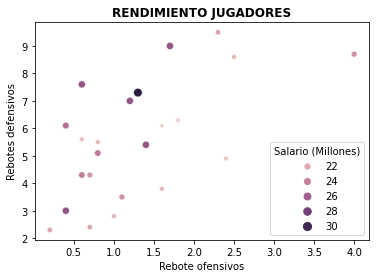

In [13]:
sns.scatterplot(Mejores['ORB'], Mejores['DRB'], marker='o', legend=True,hue=Mejores['SALARY_MILLIONS'], size=Mejores['SALARY_MILLIONS'])
plt.xlabel('Rebote ofensivos')
plt.ylabel("Rebotes defensivos")
plt.title('RENDIMIENTO JUGADORES',  fontweight = "bold")
plt.legend(title="Salario (Millones)")
plt.show()

Una posible forma de medir el rendimiento de los jugadores es ver que tan buenos son en los rebotes. Lo ideal sería que en la imagen se situen en la parte superior a la derecha, lo que significaría que cuando el equipo contraio falla el tiro el jugador coge la pelota y que cuando su equipo falla consigue el balón. 

En la imagen se ve como la mayoría no suelen ser tan buenos en los rebotes ofensivos comparándolo con el que mayor numero de rebotes ofensivos tiene. En el caso de los rebotes defensivos se ve mayor variabilidad. En base al gráfico anterior se puede deducir que ell salario no está muy relacionado con lo que se podría considerar un buen rendimiento por rebotes de un jugador.

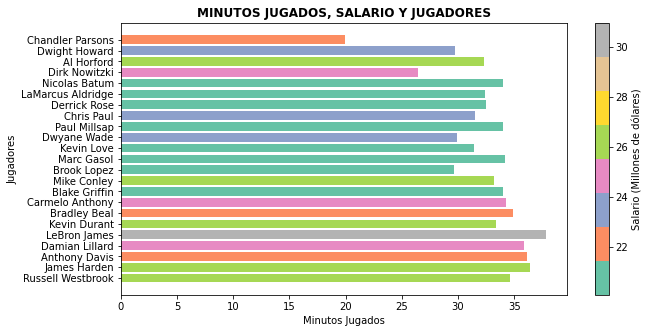

In [14]:
plt.figure(figsize=(10, 5))
data_x = Mejores['PLAYER']
data_hight = Mejores['MP']
data_color = Mejores['SALARY_MILLIONS']
norm = plt.Normalize(min(Mejores['SALARY_MILLIONS']), max(Mejores['SALARY_MILLIONS']))
cmap = plt.get_cmap("Set2")
colors=cmap
sm = ScalarMappable(cmap=colors, norm=plt.Normalize(min(data_color),max(data_color)))
sm.set_array([])
cbar = plt.colorbar(sm, label='Salario (Millones de dólares)')
plt.grid(False)
plt.barh(width=Mejores['MP'], y=Mejores['PLAYER'], color=cmap(norm(Mejores['SALARY_MILLIONS'])))
plt.xlabel("Minutos Jugados")
plt.ylabel("Jugadores")
plt.title("MINUTOS JUGADOS, SALARIO Y JUGADORES",fontweight = "bold")
plt.show()


El jugador con mayor salario es LeBron James, y en este caso es el que tiene más minutoos jugados y más gana, pero observando a todos los jugadores y los minutos jugados no se puede establecer que exista una relación entre el salario y los minutos jugados de los jugadores.

Se van a analizar la cantidad de canastas que cada jugador aporta a su equipo y de que tipo son esas canastas. Ya que un tiro libre es una oportunidad de meter canasta y ganar 1 punto sin oposición del equipo contrario. Mientras que 3-Point Field Goals se refiere a una canasta donde se pueden llegar a ganar 3 puntos.

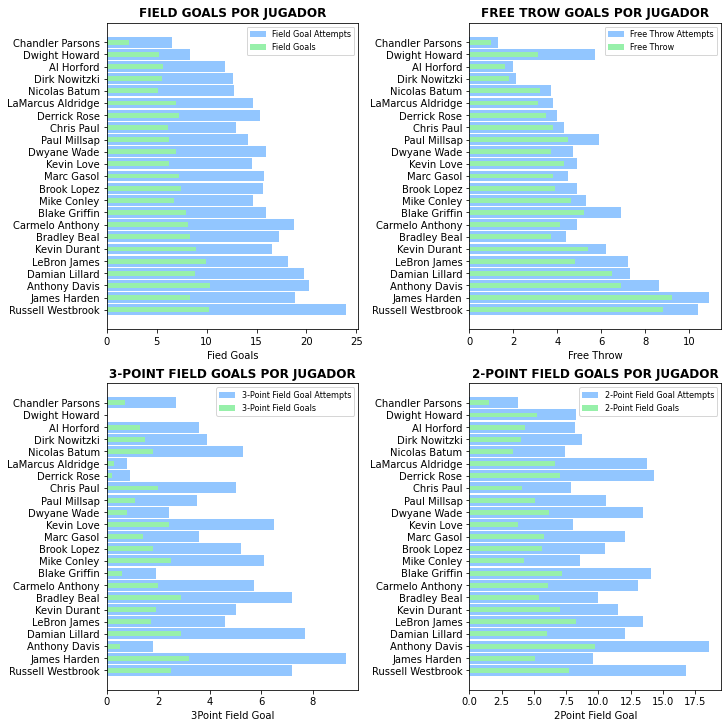

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),constrained_layout = True)
plt.grid(False)

#FIELD GOALS POR JUGADOR
axes[0,0].barh(y=Mejores['PLAYER'],width=Mejores['FGA'],height = 0.9)
axes[0,0].barh(y=Mejores['PLAYER'],width=Mejores['FG'], height = 0.4)
axes[0,0].legend(['Field Goal Attempts','Field Goals'], fontsize=8)
axes[0,0].set_title('FIELD GOALS POR JUGADOR', fontweight = "bold")
axes[0,0].set_xlabel('Fied Goals')

#FREE THROW POR JUGADOR
axes[0,1].barh(y=Mejores['PLAYER'],width=Mejores['FTA'],height= 0.9)
axes[0,1].barh(y=Mejores['PLAYER'],width=Mejores['FT'], height= 0.4)
axes[0,1].legend(['Free Throw Attempts','Free Throw '],  fontsize=8)
axes[0,1].set_title('FREE TROW GOALS POR JUGADOR',  fontweight = "bold")
axes[0,1].set_xlabel('Free Throw')

#3POINT FIELD POR JUGADOR
axes[1,0].barh(y=Mejores['PLAYER'],width=Mejores['3PA'],height= 0.9)
axes[1,0].barh(y=Mejores['PLAYER'],width=Mejores['3P'], height= 0.4)
axes[1,0].legend(['3-Point Field Goal Attempts','3-Point Field Goals '],  fontsize=8)
axes[1,0].set_title('3-POINT FIELD GOALS POR JUGADOR', fontweight = "bold")
axes[1,0].set_xlabel('3Point Field Goal')

#2POINT FIELD POR JUGADOR
axes[1,1].barh(y=Mejores['PLAYER'],width=Mejores['2PA'],height= 0.9)
axes[1,1].barh(y=Mejores['PLAYER'],width=Mejores['2P'], height= 0.4)
axes[1,1].legend(['2-Point Field Goal Attempts','2-Point Field Goals '],  fontsize=8)
axes[1,1].set_title('2-POINT FIELD GOALS POR JUGADOR', fontweight = "bold")
axes[1,1].set_xlabel('2Point Field Goal')
plt.show()

Se puede intuir que la cantidad de canastas, va a influir en el salario. Igualmente se van a analizar más aspectos graficamente:
- La efectivadad de los jugadores, como se explico en un principio la efectivada es una medida ponderada del porcentaje de tiro. Por tanto nos va a servir para medir de forma mas precisa el éxito de tiro por jugador. 
- Player Impact Estimate que nos ayudará a saber la contribución general de un jugador al juego en su equipo.
- Partidos jugados y ganados por jugador.

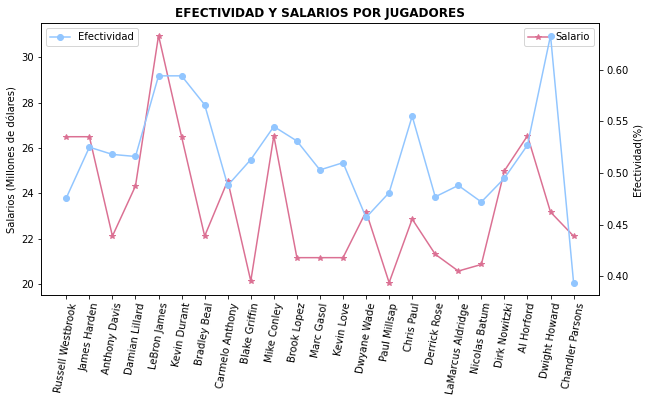

In [16]:
#EFECTIVIDAD Y SALARIOS POR JUGADORES
plt.figure(figsize=(10, 5))
plt.grid(False)
plt.plot(Mejores['PLAYER'],Mejores['SALARY_MILLIONS'],color= "palevioletred",marker='*')
plt.legend(['Salario'])
plt.ylabel('Salarios (Millones de dólares)')
plt.xticks(rotation=80)
plt.twinx()
plt.grid(False)
plt.plot(Mejores['PLAYER'],Mejores['eFG%'], marker='o')
plt.legend(['Efectividad'])
plt.title('EFECTIVIDAD Y SALARIOS POR JUGADORES', fontweight = "bold")
plt.ylabel('Efectividad(%)')
plt.xticks(rotation=80)
plt.show()

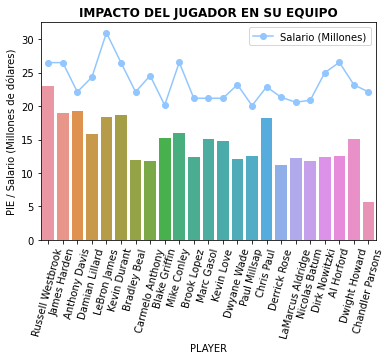

In [17]:
plt.grid(False)
plt.plot(Mejores['PLAYER'],Mejores['SALARY_MILLIONS'], marker='o')
plt.legend(['Salario (Millones)'])
sns.barplot(Mejores['PLAYER'],Mejores['PIE'])
plt.xticks(rotation=75)
plt.ylabel('PIE / Salario (Millones de dólares)')
plt.title('IMPACTO DEL JUGADOR EN SU EQUIPO', fontweight = "bold")
plt.show()


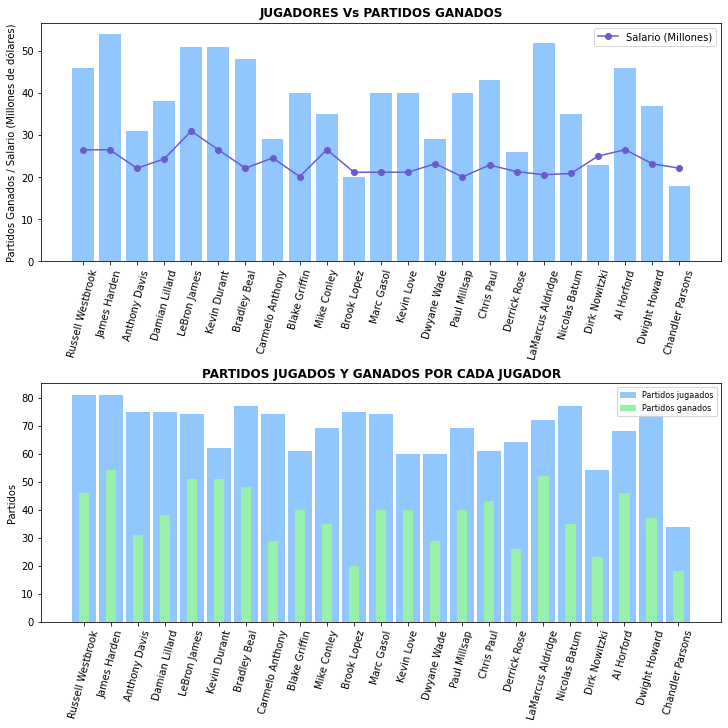

In [18]:
fig, axes = plt.subplots(nrows=2, figsize=(10, 10),constrained_layout = True)


#JUGADORES Vs WINS
axes[0].plot(Mejores['PLAYER'],Mejores['SALARY_MILLIONS'], color='slateblue', marker='o')
axes[0].legend(['Salario (Millones)'])
axes[0].bar(Mejores['PLAYER'],Mejores['W'])
axes[0].set_ylabel("Partidos Ganados / Salario (Millones de dólares)")
axes[0].set_title('JUGADORES Vs PARTIDOS GANADOS', fontweight = "bold")
axes[0].set_xticklabels(Mejores['PLAYER'], rotation=75)

#PARTIDOS JUGADOS Y GANADOS POR JUGADOR
axes[1].bar(x=Mejores['PLAYER'],height=Mejores['GP'],width= 0.9)
axes[1].bar(x=Mejores['PLAYER'],height=Mejores['W'], width= 0.4)
axes[1].legend(['Partidos jugaados','Partidos ganados '],  fontsize=8)
axes[1].set_xticklabels(Mejores['PLAYER'], rotation=75)
axes[1].set_ylabel("Partidos")
axes[1].set_title('PARTIDOS JUGADOS Y GANADOS POR CADA JUGADOR', fontweight = "bold")


plt.show()

##### HEATMAP DE CORRELACIONES DE PEARSON

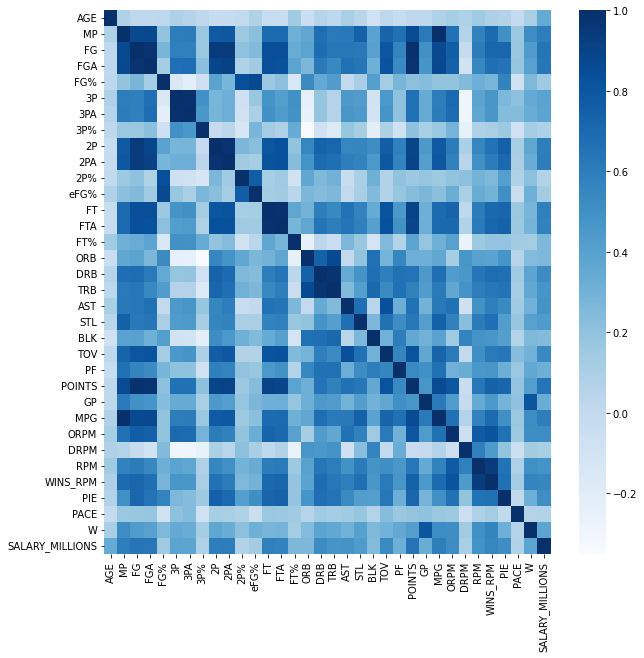

In [19]:
#Matriz de correlaciones entre variables
df=Datos.iloc[:, 4:39]
df=df.drop('TEAM',axis=1)
corr_df= df.corr(method='pearson')
plt.figure(figsize=(10, 10))
sns.heatmap(corr_df, cmap= "Blues")
plt.show()

Con todos los gráficos anteriores se puede decir que en general no hay una relación directa que se pueda identificar entre los jugadores y diferentes aspectos de su rendimiento. Existen variables que influyen en el salario, pero no son tan evidentes en general, por lo que se procederá a hacer estudios más profundos. 

Otra relación que puede haber con el salario es el "engagement" que tiene en cuenta lo que generan en redes sociales o lo influyentes que son más alla de los partidos. Estos datos se encuentran en una matriz de datos que no utilizaremos en este estudio.

##  4. PCA: ANÁLISIS DE COMPONENTES PRINCIPALES 

Se procede a hacer un análisis de componentes principales para conocer las mayores direcciones de varianza de los features. Para el análisis de componentes principales es necesario utilizar la matriz de datos numérica y separarla de los features que tienen valores de string, además es necesario estandarizar los datos y escalarlos para poder modelarlos.

In [20]:
#PCA
#X es la matriz de features
Datos_Values=Datos.drop('Rk',1)
Datos_Values=Datos_Values.drop('TEAM',1)
Datos_Values=Datos_Values.drop('PLAYER',1)
Datos_Values=Datos_Values.drop('POSITION',1)
Features_List=Datos_Values.columns.tolist()

#Estandarización de Features: 
DatosStandardScalerObject = StandardScaler().fit_transform(Datos_Values)

#HACER PCA
DatosPCA= PCA ()
DatosPrincipalComponents = DatosPCA.fit_transform(DatosStandardScalerObject)


#DATA FRAME DE PCA
DatosPCADF = pd.DataFrame(data = DatosPrincipalComponents, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12', 
                                                                      'PC 13', 'PC 14', 'PC 15', 'PC 16', 'PC 17', 'PC 18', 'PC 19', 'PC 20',
                                                                      'PC 21', 'PC 22', 'PC 23', 'PC 24', 'PC 25', 'PC 26','PC 27' ,'PC 28', 'PC 29', 'PC 30', 'PC 31', 'PC 32',
                                                                      'PC 33', 'PC 34', 'PC 35'])

Features_NBA=Datos[['Rk','PLAYER','POSITION','TEAM']]
Features_PCA_NBA_DF=np.concatenate([Features_NBA,DatosPCADF],axis=1)
Features_PCA_NBA_DF = pd.DataFrame(data=Features_PCA_NBA_DF, columns=['Rk','PLAYER','POSITION','TEAM','PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12', 
                                                                      'PC 13', 'PC 14', 'PC 15', 'PC 16', 'PC 17', 'PC 18', 'PC 19', 'PC 20',
                                                                      'PC 21', 'PC 22', 'PC 23', 'PC 24', 'PC 25', 'PC 26','PC 27' ,'PC 28', 'PC 29', 'PC 30', 'PC 31', 'PC 32',
                                                                      'PC 33', 'PC 34', 'PC 35'])
Features_PCA_NBA_DF=Features_PCA_NBA_DF.convert_dtypes(convert_floating=True)


#### Varianza Explicada

En los siguientes plots se puede observar en que componentes principales se encuentran las mayores direcciones de varianza, esto es debido a que los valores propios que componen a dichos componentes tienen mayor energía que los de las otras componentes. Podemos observar que solo en la primera componente principal obtenemos más del 40% de la varianza total acumulada. En el caso de que decidamos utilizar más componentes (como vemos en la Varianza acumulada explicada), solo es necesario utilizar 13 componentes de 34 para obtener explicar más del 95% de la varianza total del data set, algunas columnas no aportan tanta información. Para poder ver esto con más detenimiento es necesario obtener los valores y vectores propios de las componentes principales y ver que variables son las que influyen más en este peso, lo que veremos más adelante también con la matriz de covarianzas de la PCA.

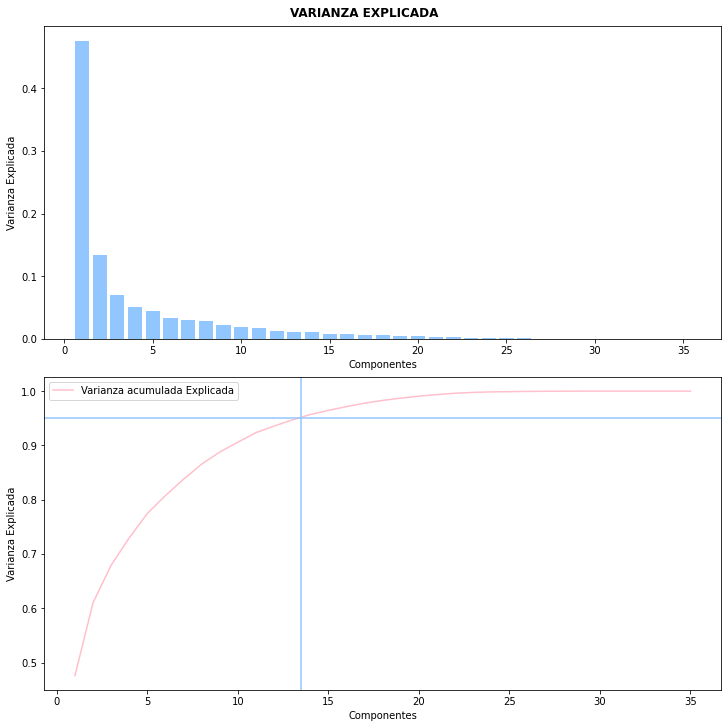

In [21]:
fig, axes = plt.subplots(nrows=2, figsize=(10, 10),constrained_layout = True)
plt.suptitle('VARIANZA EXPLICADA', fontweight = "bold")


#EXPLAINED VARIANCE PLOT  

axes[0].bar(range(1,len(DatosPCA.explained_variance_ratio_)+1),DatosPCA.explained_variance_ratio_)
axes[0].set_ylabel('Varianza Explicada')
axes[0].set_xlabel('Componentes')

#Varianza explicada acumulada
axes[1].plot(range(1,len(DatosPCA.explained_variance_ratio_)+1),
         np.cumsum(DatosPCA.explained_variance_ratio_),
         c='pink',
         label="Varianza acumulada Explicada")
axes[1].legend(loc='upper left')
axes[1].set_ylabel('Varianza Explicada')
axes[1].set_xlabel('Componentes')
axes[1].axhline(0.95)
axes[1].axvline(13.46)

plt.show()

#### Componentes principales

<AxesSubplot:>

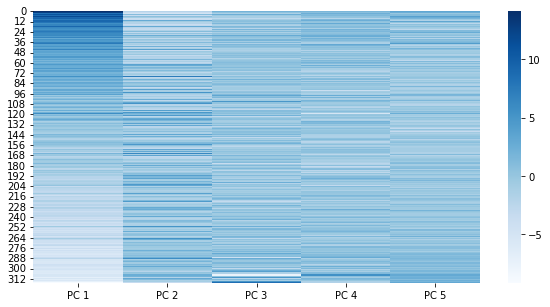

In [22]:
# Heatmap de componentes principales
# ==============================================================================
plt.figure(figsize=(10, 5))
sns.heatmap(DatosPCADF.iloc[:,0:5], cmap= "Blues")

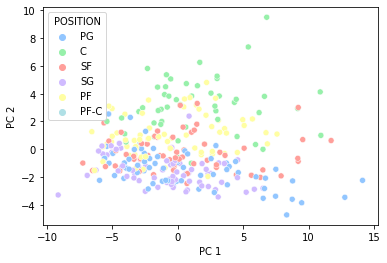

In [23]:
#SCATTER PLOT DE PCA 1 Y 2
#PCA predicting different features
sns.scatterplot(x= 'PC 1', y = 'PC 2' , data= Features_PCA_NBA_DF, hue= 'POSITION')
plt.show()

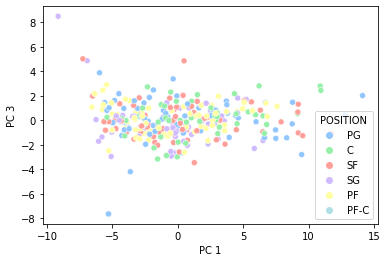

In [24]:
sns.scatterplot(x= 'PC 1', y = 'PC 3' , data= Features_PCA_NBA_DF, hue= 'POSITION')
plt.show()

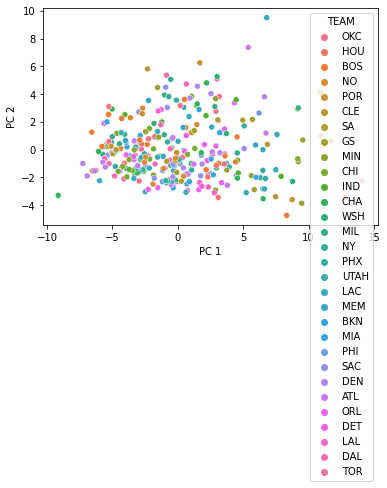

In [25]:
sns.scatterplot(x= 'PC 1', y = 'PC 2' , data= Features_PCA_NBA_DF, hue= 'TEAM')
plt.show()

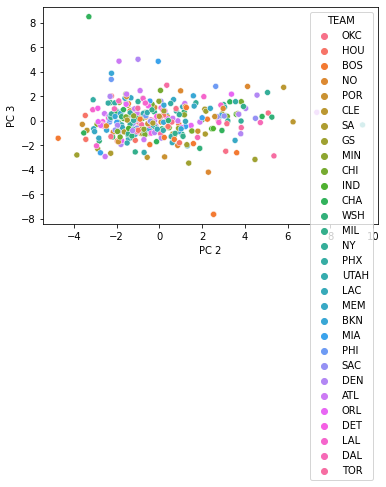

In [26]:
sns.scatterplot(x= 'PC 2', y = 'PC 3' , data= Features_PCA_NBA_DF, hue= 'TEAM')
plt.show()

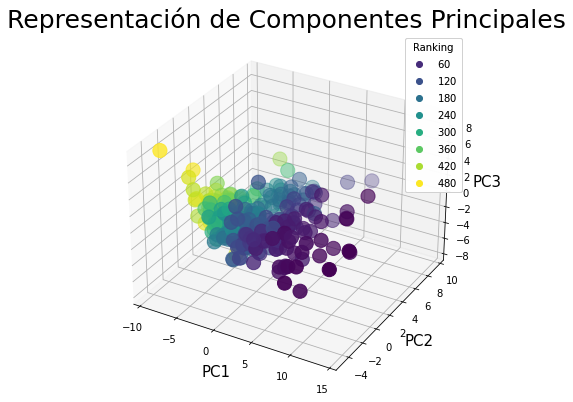

In [47]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5,5))
axes = Axes3D(fig)
axes.set_title('Representación de Componentes Principales', size=25)
axes.set_xlabel('PC1',size=15)
axes.set_ylabel('PC2', size=15)
axes.set_zlabel('PC3', size=15)

scatter=axes.scatter(Features_PCA_NBA_DF['PC 1'],Features_PCA_NBA_DF['PC 2'],Features_PCA_NBA_DF['PC 3'],c= Features_PCA_NBA_DF['Rk'], cmap = 'viridis', s=200)
legend1=axes.legend(*scatter.legend_elements(),loc="upper right", title="Ranking", prop={'size': 10})
axes.add_artist(legend1)
plt.show()

No se ha podido definir un patron determinado con las graficas de los componentes observados de la PCA. Utilizando la infromacon de una tercera componente se logra distinguir mejor las caracterisiticas de los datos.

En el siguiente paso se muestra la matriz de covarianza donde podemos observar que las variables con más peso se encuentran en la esquina superior izquierda. En el caso de hacer una selección de variables utilizariamos las variables con mayor covarianza, ya que repesentan la mayoría de información del espacio transformado. Por ende, del espacio original.


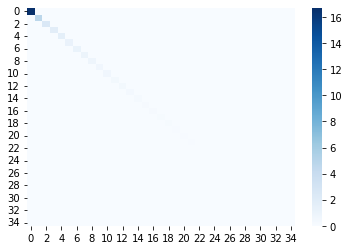

In [28]:
from sklearn.decomposition import PCA
import statsmodels.api as sm

#Cargar los datos
df=Datos_Values
n_samples, p = df.shape
p = p - 1
X = df.drop("SALARY_MILLIONS", axis = 1).values
y = df.SALARY_MILLIONS.values
pca = PCA()

#PCA
#Estandarización de Features

X= DatosPCA.fit_transform(DatosStandardScalerObject)

X_transformed = pca.fit_transform(X)

# Centramos los datos y calculamos la matriz de covarianzas para la PCA.

X_centered = X - np.mean(X, axis=0)

#Matriz de covarianzas producto cruz de los datos centrados

cov_matrix = np.dot(X_centered.T, X_centered) / n_samples

sns.heatmap(cov_matrix, cmap= "Blues")
plt.show()

#eigenvalues = pca.explained_variance_
#for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
    #print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    #print(eigenvalue)

Podemos observar que las variables del espacio transformado estan incorreladas entre si, lo que significa que algunas variables podrían ser independientes, pero no se puede afirmar con exactitud.

Al ser el PCA un método sostenido en la varianza, presenta alta sensibilidad a la presencia de outliers, como mencionamos antes. En nuestro caso los datos presentan valores fuera de rango, como vemos en los boxplots de Visualización de datos , por lo que no lo utilizaremos para hacer selección de variables para machine learning.
En caso tal de llegar de necesitarlo para selección de variables tendríamos que ver los valores y vectores propios de la matriz de covarianza con lo que podríamos escoger las variables del dataframe de mayor peso y posteriormente utilizarlas para la construcción de un modelo de predicción.

Ya que la utilidad de una PCA es la reducción de la dimensionalidad de un espacio, lo que es análogo a quitar variables de un dataset por otros métodos como puede ser SVM o Leave one Out y otros métodos utilizados en Machine Learning.

## 5. NORMALIDAD DE LOS DATOS

#### Gráficos de distribución de variables

Para proceder a hacer análisis estadísticos de manera correcta es necesario comprobar la normalidad de los datos.Se observan la distribuciones de nuestras variables, para comprobar de manera visual la normalidad de los datos.

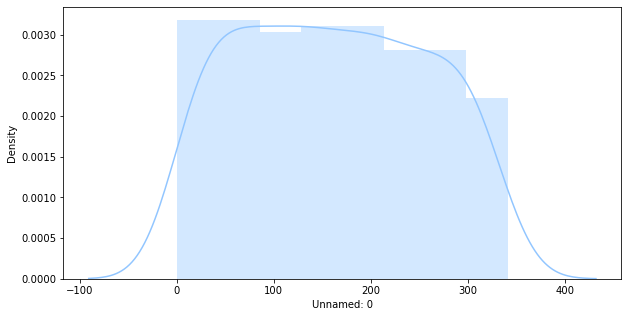

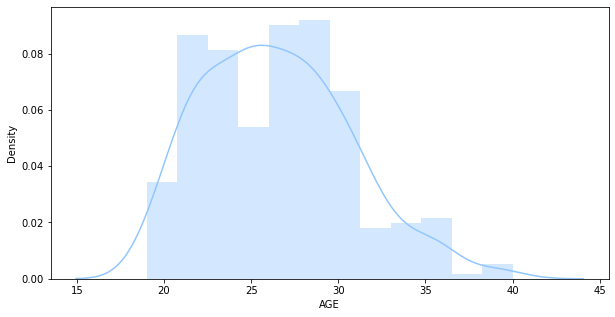

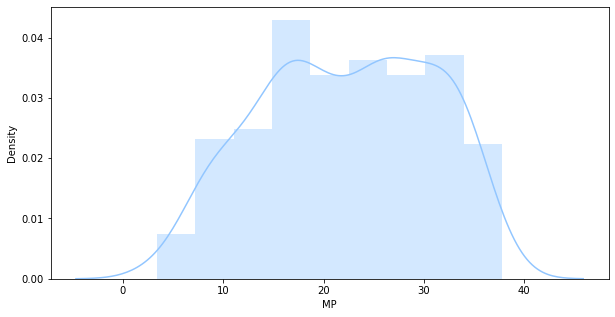

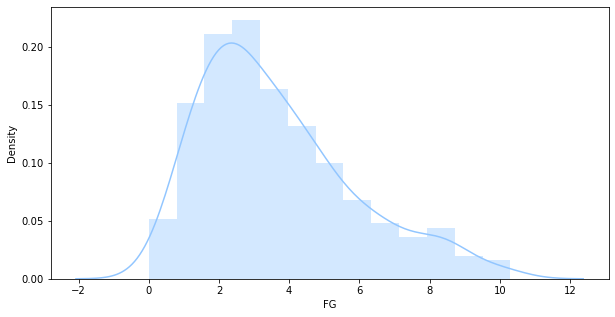

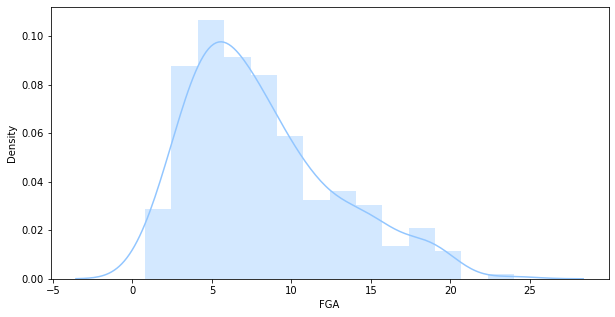

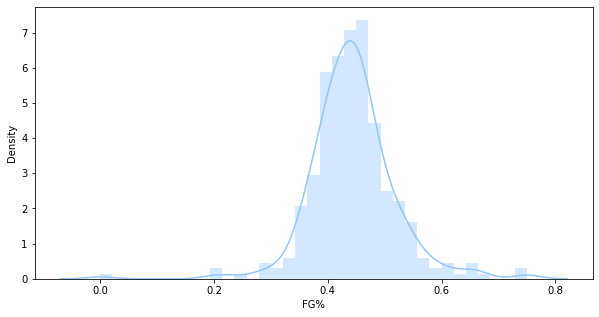

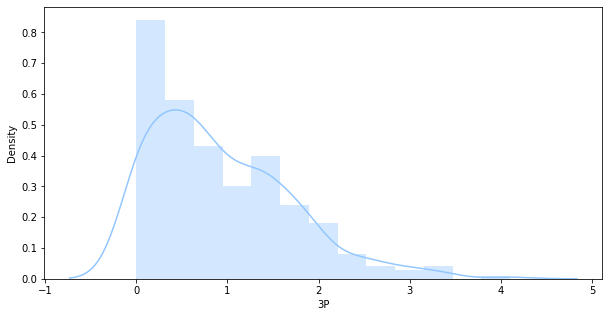

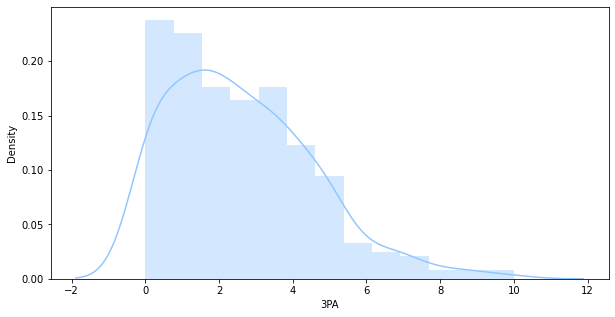

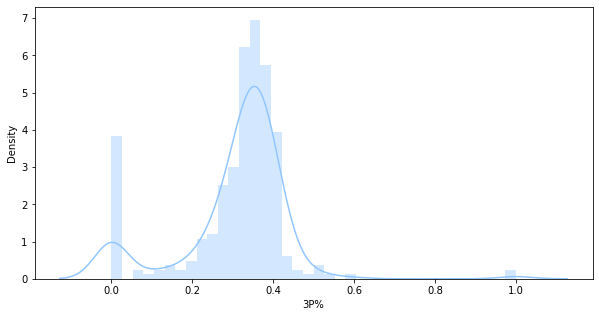

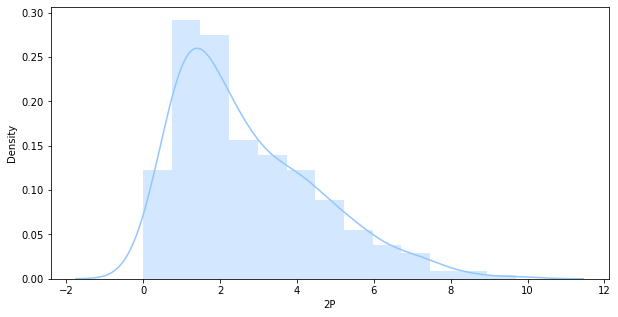

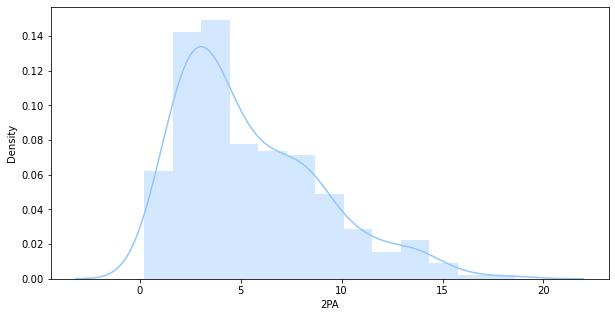

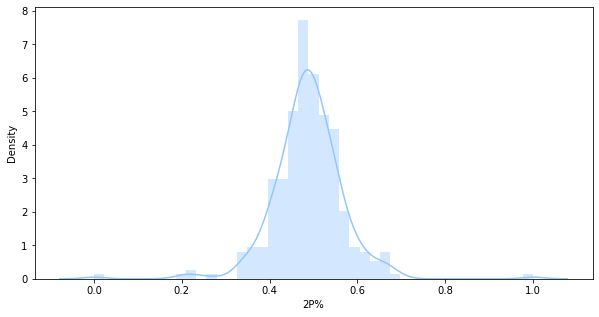

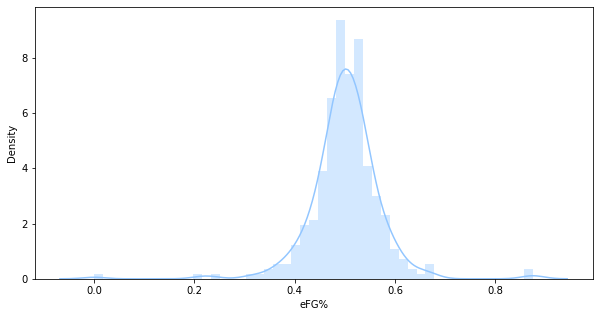

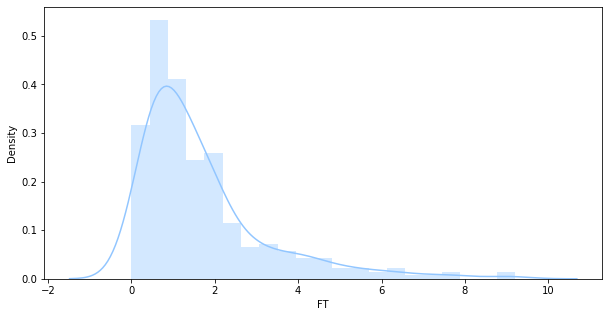

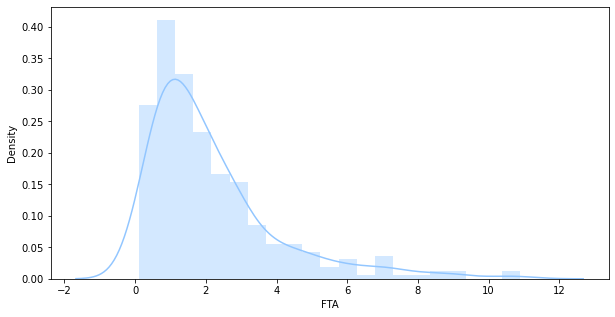

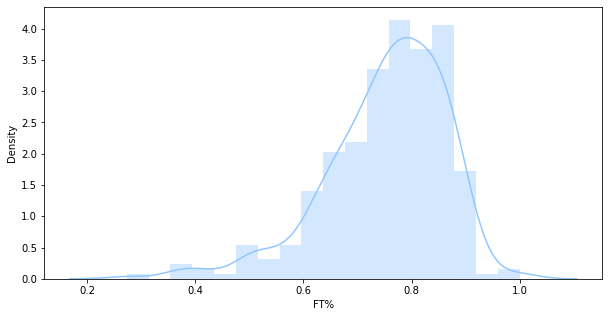

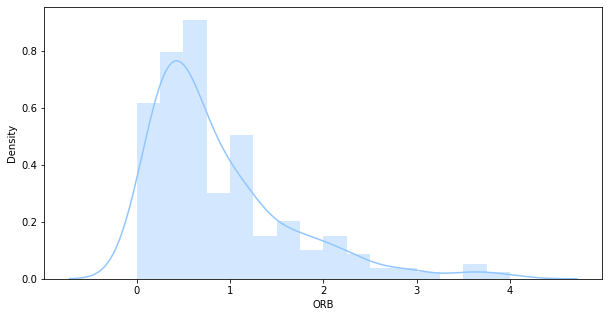

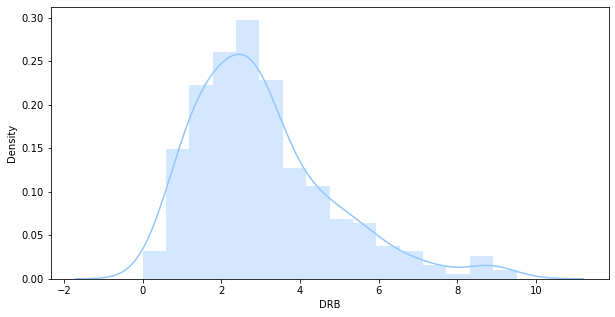

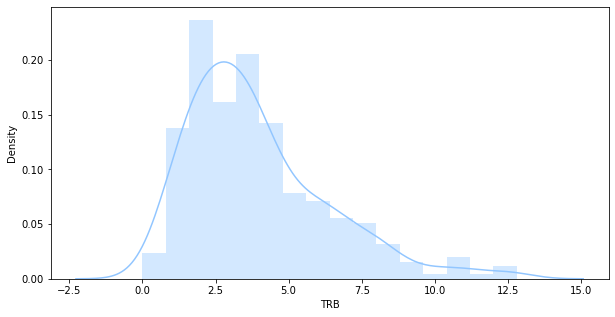

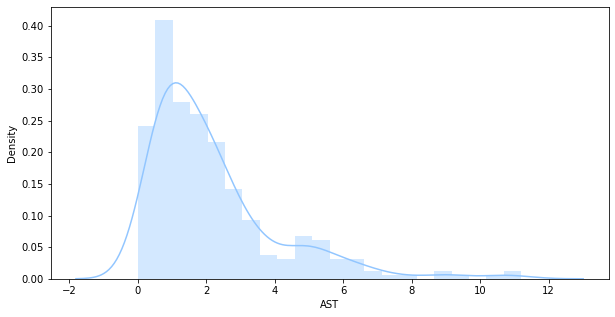

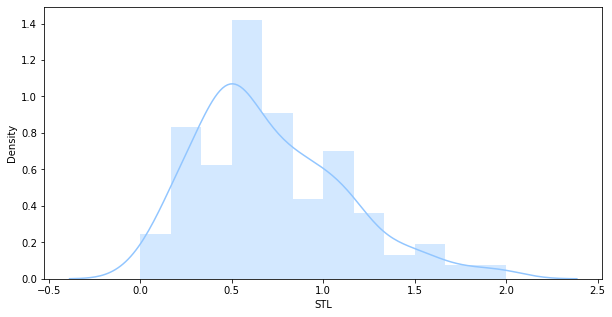

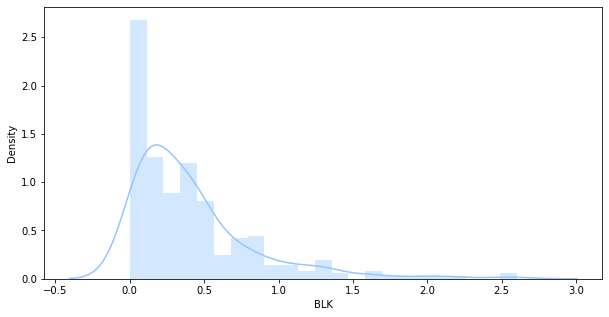

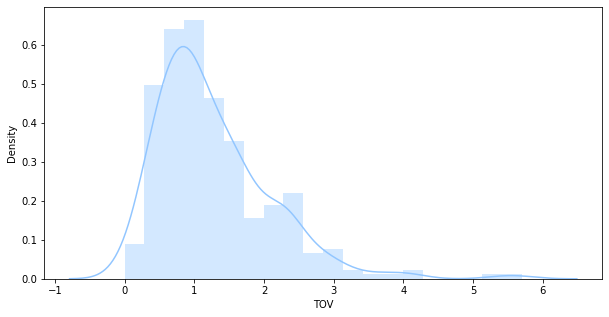

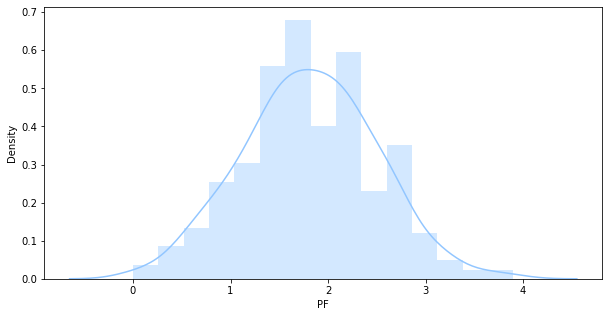

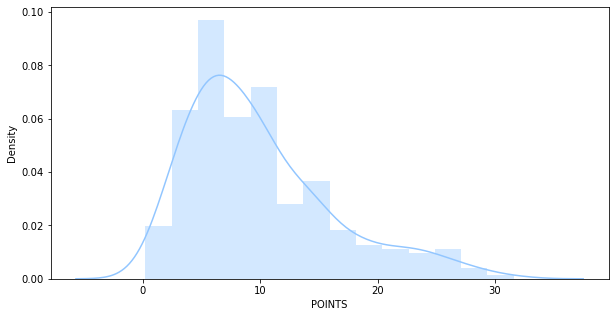

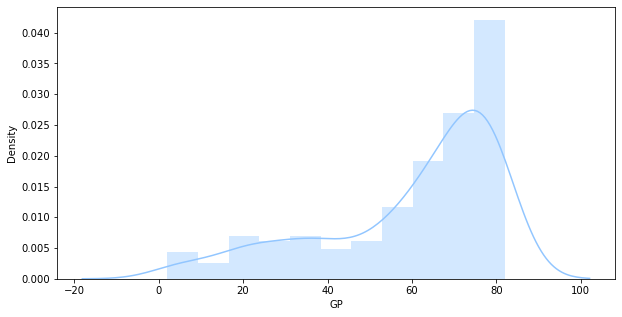

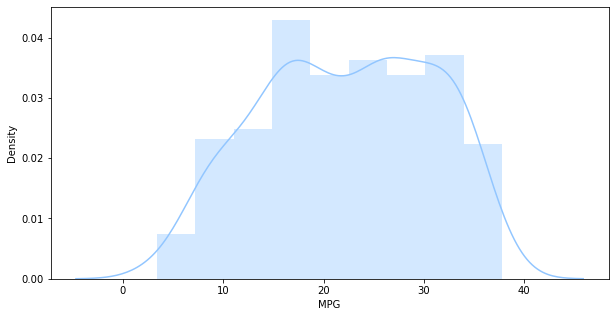

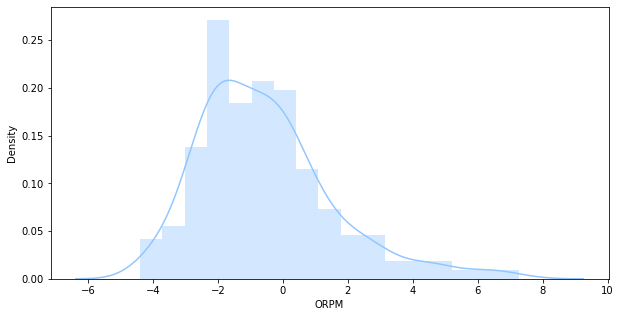

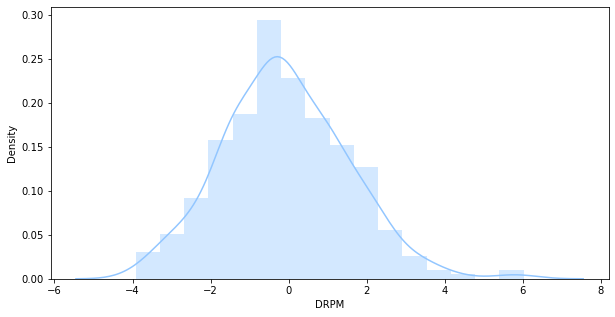

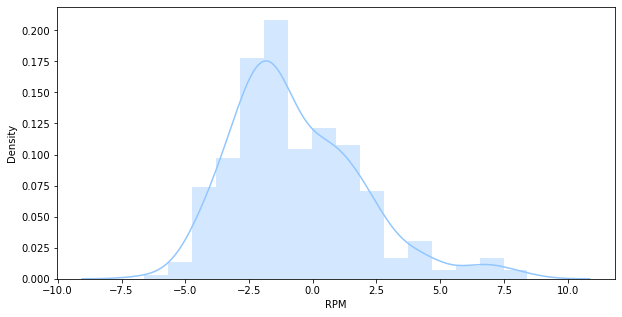

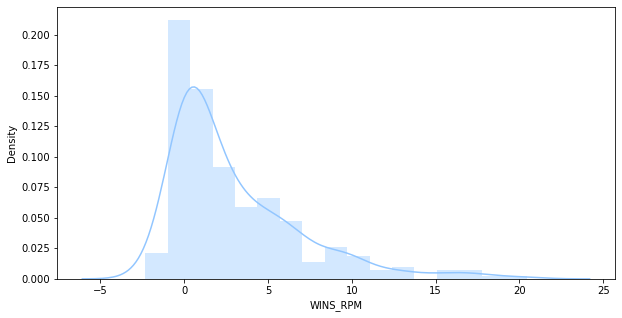

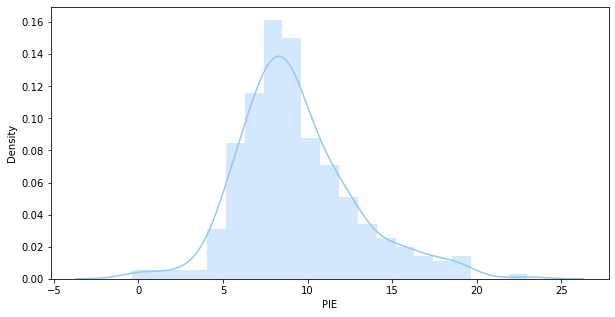

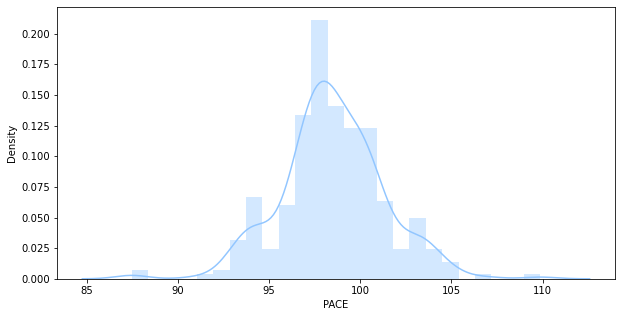

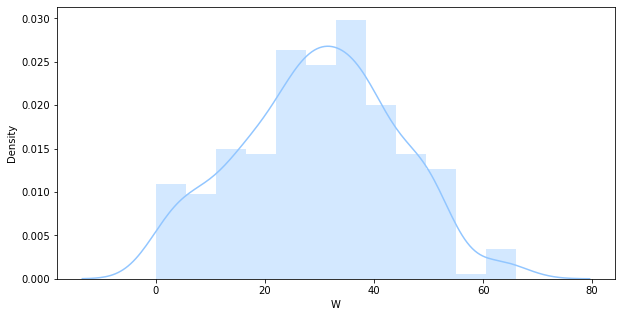

In [29]:
for i in range(0,34):
    plt.figure(figsize=(10, 5))
    sns.distplot(Datos_Values.iloc[:,i])
    plt.show()

#### Test de normalidad de datos: Shapiro

En el apartado anterior hemos realizado las graficas de distribución de los datos, pero para asegurarnos mejor realizamos un test. Para ello realizamos el test de shapiro sobre las columnas de nuestro dataframe, que corresponden a las variables.

En el test de Shapiro contamos con las siguientes hipótesis.

- Hipótesis Nula-H0: La distribución es normal

- Hipótesis Alternativa-H_1: La distribución no es normal.

o más formalmente aún:

- H_0: X∼N(μ,σ^2)
 
- H_1:X≁N(μ,σ^2)


In [30]:
pvalue=[]
for i in range(0,34):
    r,p=stats.shapiro(df.iloc[:,i])
    pvalue.append(p)
    
    
np.mean(pvalue), # los datos proceden de poblaciones normales en su mayoria
print(f"La media de los pvalues del Saphiro: {np.mean(pvalue)}.")

#Miro si alguna variable no es normal
si=0
po=[]
no=0
for i in range(0,len(pvalue)):
    if pvalue[i]<0.05:
        si=si+1
    if pvalue[i]>0.05:
        po.append(i)
        no=no+1
si
no

print(f"De todas las variables que tenemos que son {df.shape[1]}. Aquellas variables que proceden de poblacione normales son {si}, por lo que hay {no} variable que no probiene de distribución normal.  ")
print(f"Es la variable {po} la que no proviene de una distribucion normal, y corresponde a {Datos.columns[po[0]]}. ")

La media de los pvalues del Saphiro: 0.021389672947368123.
De todas las variables que tenemos que son 35. Aquellas variables que proceden de poblacione normales son 33, por lo que hay 1 variable que no probiene de distribución normal.  
Es la variable [23] la que no proviene de una distribucion normal, y corresponde a STL. 


# VOLUMEN 2: ÁNALISIS ESTADÍSTICO CON MACHINE LERNING

## 6. MODELO LINEAL PARA PREDECIR EL SALARIO UTILIZANDO TODAS LAS VARIABLES

En este caso intentaremos crear un modelo que prediga el salario de los jugadores en base a todas las variables. Se crearán los sets de training y dataset asignándoles el 50% de los datos a cada uno en este caso para observar como se haría un modelo tipo "sloppy", solo para entender como está funcionando y en base a este modelo intentaremos mejorar los indicadores (AUC, AIC, BIC, SENSIBILIDAD Y RECALL).

RMSE en el error de entrenamiento es:  3.707280029727075
RMSE en el error de test es:  5.289292150663082


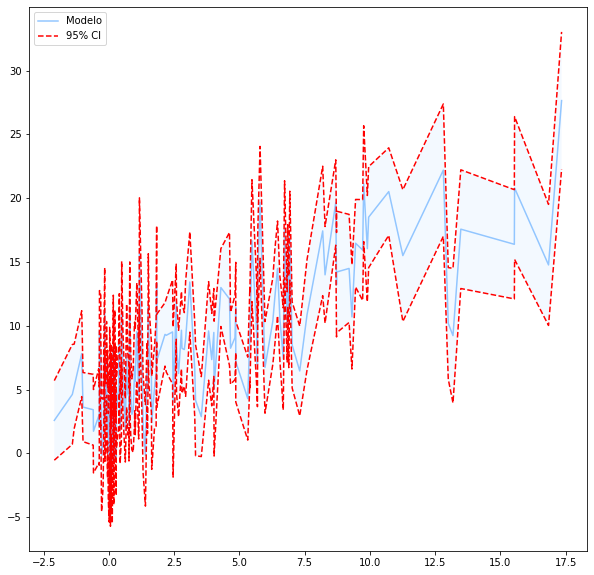

In [31]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
import random

random.seed(100)
df=Datos_Values
n, p = df.shape
p = p - 1
X = df.drop("SALARY_MILLIONS", axis = 1).values
X = sm.add_constant(X)
Y = df.SALARY_MILLIONS.values


# Dividimos los datos en training y test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

# Modelo lineal con todas las variables.
model_L = sm.OLS(Y_train, X_train)
model_fit = model_L.fit()
ypred = model_fit.predict(X_train)
rmse_train = rmse(Y_train, ypred)

ypred = model_fit.predict(X_test)
rmse_test = rmse(Y_test, ypred)
print("RMSE en el error de entrenamiento es: ", rmse_train)
print("RMSE en el error de test es: ", rmse_test)

rmse_train = np.zeros(p+1)
rmse_test = np.zeros(p+1)
length = range(0, p+1)

# Assess data with the first k variables
k = 1
while (k <= (p+1)):
    Xk_train = X_train[:,:k]
    Xk_test = X_test[:,:k]
    model_L = sm.OLS(Y_train, Xk_train)
    model_fit = model_L.fit()
    ypred = model_fit.predict(Xk_train)
    rmse_train[k-1] = rmse(Y_train, ypred)
    ypred = model_fit.predict(Xk_test)
    rmse_test[k-1] = rmse(Y_test, ypred)
    k = k +1
    
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = model_fit.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 31]
predicciones['y'] = Y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(10, 10))


ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="Modelo")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

El error cuadrático medio (RMSE) mide la cantidad de error que hay entre dos conjuntos de datos, cuanto menor sea mejor. Se ha calculado que el RMSE del entrenamiento de los datos es menor que el RMSE del test, lo que tiene sentido ya que siempre hay un mayor error cuando utilizamos el dataset de test.



#### Curva de complejidad del modelo Vs error de predicción en el test y entrenamiento de datos

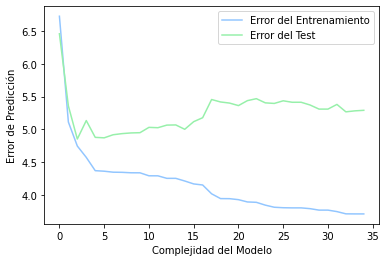

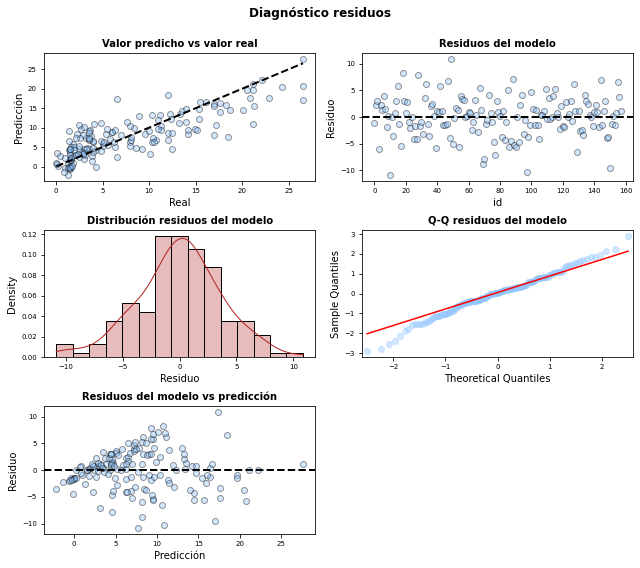

In [32]:
plt.clf()
plt.plot(length, rmse_train, label = 'Error del Entrenamiento')
plt.plot(length, rmse_test, label = 'Error del Test')
plt.legend()
plt.xlabel("Complejidad del Modelo")
plt.ylabel("Error de Predicción")
plt.grid(False)
plt.show()

#Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = Y_train.flatten()
prediccion_train = model_fit.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

## 7. REGRESIÓN LOGÍSITCA UTILIZANDO TODAS LAS VARIABLES, PARA PREDECIR SALARIOS MAYORES A 10 MILLONES DE DÓLARES

La regresión logística es utilizada para predecir variables categóricas por lo que observaremos los salarios mayores a 10 millones de dólares.

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.835


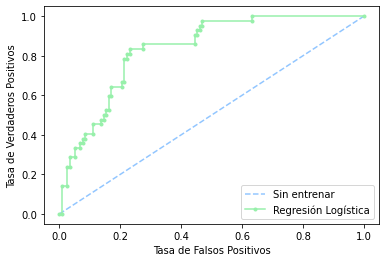

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

random.seed(100)
df=Datos_Values
n, p = df.shape
p = p - 1
X = df.drop("SALARY_MILLIONS", axis = 1).values
X = sm.add_constant(X)
Y = df.SALARY_MILLIONS.values>10

# Dividimos los datos en training y test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

ns_probs = [0 for _ in range(len(Y_test))]
# Entrenamos nuestro modelo de reg log
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, Y_train)
# Predecimos las probabilidades
lr_probs = model.predict_proba(X_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr_logistica, lr_tpr_logistica, _ = roc_curve(Y_test, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr_logistica, lr_tpr_logistica, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

En este caso podemos observar que el modelo no es muy bueno pues tiene bastantes errores al predecir las columnas de datos, esto se puede observar posteriormente al realizar los plots para el modelo lineal con un intervalo de confianza del 95% donde no se puede decir que haya linealidad alguna y el predictor falla con frecuencia.

#### Curva de Sensibilidad y Precisión

Regresión Logística: f1=0.525 auc=0.585


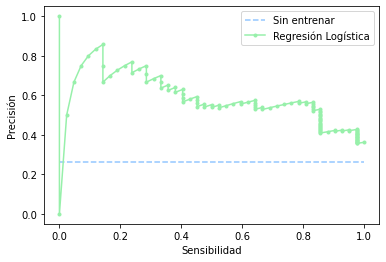

In [34]:
random.seed(100)
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# Sacamos los valores
# predecimos probabilidades

lr_probs = model.predict_proba(X_test)
# Nos quedamos unicamente con las predicciones positivas
lr_probs = lr_probs[:, 1]


yhat = model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(Y_test, lr_probs)
lr_f1, lr_auc = f1_score(Y_test, yhat), auc(lr_recall, lr_precision)
# Resumimos s
print('Regresión Logística: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Regresión Logística')
#Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
pyplot.show()

Podemos observar que a priori no seleccionar las variables produce predicciones con valores del estadístico F y AUC bastante bajas. Parece ser mejor que categorizar al azar tirando una monera pero aún así podríamos mejorar las predicciones haciendo "Feature Selection Classification".

## 8. MODELOS DE CLASIFICACION TENIENDO EN CUENTA LA SELECCIÓN DE VARIABLES POR T-TEST

### MODELO 1: MODELO LINEAL

#### Primer Filtro: Variables de poca varianza

In [35]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse

from sklearn.feature_selection import VarianceThreshold

Y=Datos_Values.loc[:,'SALARY_MILLIONS']
X = Datos_Values.iloc[:,1:33]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_reducido=pd.DataFrame(sel.fit_transform(X), columns=X.columns[0:27])
display(X_reducido)


,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,TRB,AST,STL,BLK,TOV,PF,POINTS,GP,MPG,ORPM
0,28.0,34.6,10.2,24.0,2.5,7.2,7.7,16.8,8.8,10.4,...,2.3,31.6,81.0,34.6,6.74,-0.47,6.27,17.34,23.0,102.31
1,27.0,36.4,8.3,18.9,3.2,9.3,5.1,9.6,9.2,10.9,...,2.7,29.1,81.0,36.4,6.38,-1.57,4.81,15.54,19.0,102.98
2,27.0,33.8,9.0,19.4,3.2,8.5,5.8,10.9,7.8,8.5,...,2.2,28.9,76.0,33.8,5.72,-3.89,1.83,8.19,16.1,99.84
3,23.0,36.1,10.3,20.3,0.5,1.8,9.7,18.6,6.9,8.6,...,2.2,28.0,75.0,36.1,0.45,3.90,4.35,12.81,19.2,100.19
4,26.0,34.2,9.0,19.9,1.8,5.0,7.2,14.8,7.2,9.3,...,3.9,27.0,72.0,34.2,3.56,0.64,4.20,11.26,17.8,97.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,25.0,6.9,0.5,1.8,0.3,0.6,0.3,1.1,0.3,0.4,...,0.3,1.6,16.0,6.9,-1.94,1.45,-0.49,0.08,7.3,96.26
313,22.0,5.6,0.6,1.4,0.0,0.0,0.6,1.3,0.3,0.6,...,0.5,1.5,25.0,5.6,-2.62,-0.15,-2.77,0.03,6.0,97.66
314,36.0,7.6,0.5,1.2,0.4,1.0,0.1,0.2,0.1,0.1,...,0.5,1.4,20.0,7.6,-1.93,0.35,-1.58,0.16,8.4,103.18
315,29.0,6.8,0.2,1.1,0.0,0.2,0.2,0.8,0.4,0.7,...,1.1,0.8,13.0,6.8,-2.11,0.43,-1.68,0.08,0.8,104.33


#### Segundo Filtro: T-Test para encontrar variables que son estadísticamente singnificativas en el aumento del salario

In [36]:
pvalues=[]
posiciones=[]*34
from scipy.stats import ttest_ind
for  i in X_reducido.columns[0:28]:
        
        stat, p = ttest_ind(X_reducido.loc[:,i],Y, alternative="greater")

        if p <0.05:
         print('stat=%.3f, p=%.12f' % (stat, p))
        
         pvalues.append(p)
         posiciones.append(i)

X=X_reducido.loc[:,posiciones]
X=X.values
posiciones

stat=43.041, p=0.000000000000
stat=24.528, p=0.000000000000
stat=4.773, p=0.000001130478
stat=42.016, p=0.000000000000
stat=24.528, p=0.000000000000
stat=4.439, p=0.000005332453
stat=225.405, p=0.000000000000


['AGE', 'MP', 'AST', 'STL', 'BLK', 'MPG', 'ORPM']

In [37]:
# Split data into training and test
random.seed(100)
n,p= X.shape
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

# Linear model with all variables
model_L = sm.OLS(Y_train, X_train)
model_fit = model_L.fit()
ypred = model_fit.predict(X_train)
rmse_train = rmse(Y_train, ypred)

ypred = model_fit.predict(X_test)
rmse_test = rmse(Y_test, ypred)
print("RMSE en el error de entrenamiento es: ", rmse_train)
print("RMSE en el error de test es: ", rmse_test)

rmse_train = np.zeros(int(p+1))
rmse_test = np.zeros(int(p+1))
length = range(0,int(p+1))

# Assess data with the first k variables
k = 1
while (k <= (p+1)):
    Xk_train = X_train[:,:k]
    Xk_test = X_test[:,:k]
    model_L = sm.OLS(Y_train, Xk_train)
    model_fit = model_L.fit()
    ypred = model_fit.predict(Xk_train)
    rmse_train[k-1] = rmse(Y_train, ypred)
    ypred = model_fit.predict(Xk_test)
    rmse_test[k-1] = rmse(Y_test, ypred)
    k = k +1


RMSE en el error de entrenamiento es:  4.271574446069569
RMSE en el error de test es:  4.711507071027696


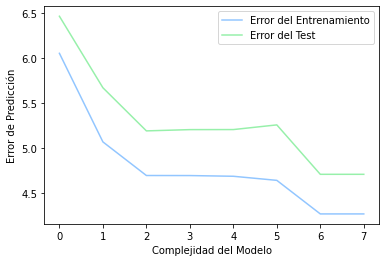

In [38]:

plt.plot(length, rmse_train, label = 'Error del Entrenamiento')
plt.plot(length, rmse_test, label = 'Error del Test')
plt.legend()
plt.xlabel("Complejidad del Modelo")
plt.ylabel("Error de Predicción")
plt.grid(False)
plt.show()

### MODELO 2: REGRESIÓN LOGÍSTICA  PARA PREDECIR SALARIOS MAYORES A 10 MILLONES DE DÓLARES

En la siguiente regresión observamos que efectivamente utilizar Feature Selection con t-test ha supuesto una mejora significativa en la predicción de los salarios, con respecto al modelo sin selección de variables en el apartado anterior.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

Y=Datos_Values.loc[:,'SALARY_MILLIONS']>10
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

ns_probs = [0 for _ in range(len(Y_test))]
# Entrenamos nuestro modelo de reg log
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, Y_train)
# Predecimos las probabilidades
lr_probs = model.predict_proba(X_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.884


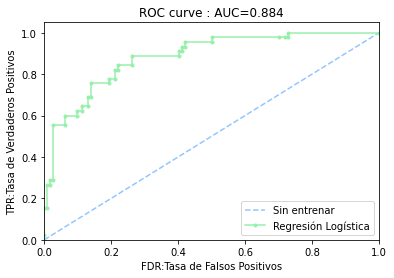

In [40]:
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes

pyplot.title('ROC curve : AUC=%0.3f' % lr_auc)
pyplot.xlabel('FDR:Tasa de Falsos Positivos')
pyplot.ylabel('TPR:Tasa de Verdaderos Positivos')
pyplot.ylim([0.0, 1.05])
pyplot.xlim([0.0, 1.0])
pyplot.legend()
pyplot.show()

Regresión Logística: f1=0.659 auc=0.772


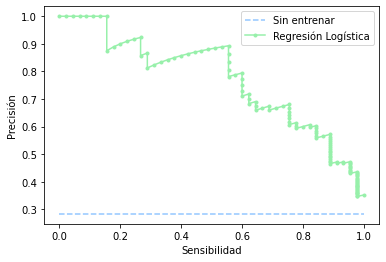

In [41]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# Sacamos los valores
# predecimos probabilidades
lr_probs = model.predict_proba(X_test)
# Nos quedamos unicamente con las predicciones positivas
lr_probs = lr_probs[:, 1]
yhat = model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(Y_test, lr_probs)
lr_f1, lr_auc = f1_score(Y_test, yhat), auc(lr_recall, lr_precision)
# Resumimos
print('Regresión Logística: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Regresión Logística')
#Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
pyplot.show()

## 9.MODELO DE FEATURE SELECTION MEDIANTE THRESHOLD DE VARIANZA, SVM Y REGRESIÓN LOGÍSTICA COMO MODELO DE PREDICCIÓN DE SALARIOS MAYORES A 16 MILLONES DE DOLARES

In [42]:
#Librerías
from sklearn import svm

#### Primer Filto: Feature Selection: REMOVER LAS FEATURES CON POCA VARIANZA

In [43]:
from sklearn.feature_selection import VarianceThreshold
Y=Datos_Values.loc[:,'SALARY_MILLIONS']
X = Datos_Values.iloc[:,0:33]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_reducido=pd.DataFrame(sel.fit_transform(X), columns=X.columns[0:28])
display(X_reducido)

,Unnamed: 0,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,TRB,AST,STL,BLK,TOV,PF,POINTS,GP,MPG,ORPM
0,0.0,28.0,34.6,10.2,24.0,2.5,7.2,7.7,16.8,8.8,...,2.3,31.6,81.0,34.6,6.74,-0.47,6.27,17.34,23.0,102.31
1,1.0,27.0,36.4,8.3,18.9,3.2,9.3,5.1,9.6,9.2,...,2.7,29.1,81.0,36.4,6.38,-1.57,4.81,15.54,19.0,102.98
2,2.0,27.0,33.8,9.0,19.4,3.2,8.5,5.8,10.9,7.8,...,2.2,28.9,76.0,33.8,5.72,-3.89,1.83,8.19,16.1,99.84
3,3.0,23.0,36.1,10.3,20.3,0.5,1.8,9.7,18.6,6.9,...,2.2,28.0,75.0,36.1,0.45,3.90,4.35,12.81,19.2,100.19
4,4.0,26.0,34.2,9.0,19.9,1.8,5.0,7.2,14.8,7.2,...,3.9,27.0,72.0,34.2,3.56,0.64,4.20,11.26,17.8,97.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,333.0,25.0,6.9,0.5,1.8,0.3,0.6,0.3,1.1,0.3,...,0.3,1.6,16.0,6.9,-1.94,1.45,-0.49,0.08,7.3,96.26
313,334.0,22.0,5.6,0.6,1.4,0.0,0.0,0.6,1.3,0.3,...,0.5,1.5,25.0,5.6,-2.62,-0.15,-2.77,0.03,6.0,97.66
314,335.0,36.0,7.6,0.5,1.2,0.4,1.0,0.1,0.2,0.1,...,0.5,1.4,20.0,7.6,-1.93,0.35,-1.58,0.16,8.4,103.18
315,339.0,29.0,6.8,0.2,1.1,0.0,0.2,0.2,0.8,0.4,...,1.1,0.8,13.0,6.8,-2.11,0.43,-1.68,0.08,0.8,104.33


#### Segundo Filtro: Feature Selection Mediante Vector Machine para salarios mayores a 16 millones de dólares

In [44]:
#SUPPORT VECTOR MACHINE
#Datos
X = X_reducido.values
n,p=X.shape
y = Y.values>16

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)
X_train.shape, y_train.shape
X_test.shape, y_test.shape
#Modelado
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)


0.9133858267716536

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.895


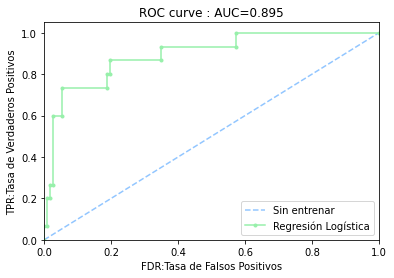

In [45]:
# Split data into training and test

from sklearn.model_selection import train_test_split

ns_probs = [0 for _ in range(len(y_test))]
# Entrenamos nuestro modelo de reg log
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
# Predecimos las probabilidades
lr_probs = model.predict_proba(X_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes

pyplot.title('ROC curve : AUC=%0.3f' % lr_auc)
pyplot.xlabel('FDR:Tasa de Falsos Positivos')
pyplot.ylabel('TPR:Tasa de Verdaderos Positivos')
pyplot.ylim([0.0, 1.05])
pyplot.xlim([0.0, 1.0])
pyplot.legend()
pyplot.show()


Regresión Logística: f1=0.659 auc=0.895


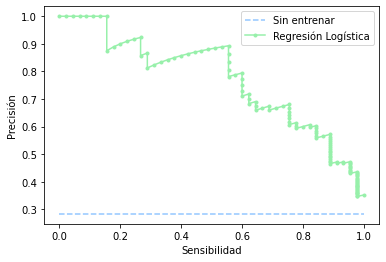

In [46]:
# Resumimos
print('Regresión Logística: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Regresión Logística')
#Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
pyplot.show()


## CONCLUSIONES

En la primera parte, se ha analizado como varía el salario en función de diferentes variables gráficamenta. Aunque aquí se han podido intuir la influencia de algunas variables. 

Con el t-test se logra ver como las variables que más influyen en el salario son 'AGE', 'MP', 'AST', 'STL', 'BLK', 'MPG', 'ORPM'.

Siempre se observo mejora con los diferentes modelos con selección de variables.De los diferentes modelos trabajados, el modelo que mejor AUC que tenemos es en el que se hace una selección de variables mediante SVM y posteriormente se realiza una regresión logistica para predecir salarios mayores a 10 millones de dólares. 

Realizando algoritmos de selección de variables logramos aumentar la predicciión de nuestro modelo, da igual cual usemos que reducir la columnas vamos a mejorar el AUC. Aunque en general se puede concluir que los modelos al tener un AUC alto, son buenos.


##  BIBLIOGRAFÍA

[Steven M. Holland, Univ. of Georgia]: Principal Components Analysis [skymind.ai]: Eigenvectors, Eigenvalues, PCA, Covariance and Entropy [Lindsay I. Smith]: A tutorial on Principal Component Analysis [Principal Component Analysis]:https://www.cienciadedatos.net/documentos/35_principal_component_analysis [Seaborn]:https://seaborn.pydata.org/generated/seaborn.lineplot.html [Logistic Regression]:https://github.com/mljs/logistic-regression/issues/8 [Jupyter Themes]:https://github.com/dunovank/jupyter-themes/tree/master/screens [Scikit Learn]:https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html [Normal Distribution]:https://medium.com/mlearning-ai/drawing-and-plotting-observations-from-a-multivariate-normal-distribution-using-r-4c2b2f64e1a3 [Roc Curve]:https://www.projectpro.io/recipes/plot-roc-curve-in-python